## =TASK 1 UNDERsTANDING THE DATASET

In [ ]:
import pandas as pd

# Replace 'your_file.csv' with the actual path or URL to your datase
df = pd.read_csv('used_cars.csv')

In [13]:
df

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"
...,...,...,...,...,...,...,...,...,...,...,...,...
4004,Bentley,Continental GT Speed,2023,714 mi.,Gasoline,6.0L W12 48V PDI DOHC Twin Turbo,8-Speed Automatic with Auto-Shift,C / C,Hotspur,None reported,Yes,"$349,950"
4005,Audi,S4 3.0T Premium Plus,2022,"10,900 mi.",Gasoline,349.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,"$53,900"
4006,Porsche,Taycan,2022,"2,116 mi.",NaN,Electric,Automatic,Black,Black,None reported,NaN,"$90,998"
4007,Ford,F-150 Raptor,2020,"33,000 mi.",Gasoline,450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,Blue,Black,None reported,Yes,"$62,999"


In [18]:
import pandas as pd

# Clean mileage: remove ' mi.' and commas, then convert to integer
df['milage'] = df['milage'].str.replace(' mi.', '', regex=False)
df['milage'] = df['milage'].str.replace(',', '', regex=False).astype(float)

# Clean price: remove '$' and commas, then convert to integer
df['price'] = df['price'].str.replace('$', '', regex=False)
df['price'] = df['price'].str.replace(',', '', regex=False).astype(float)

# Optional: check first few rows
print(df[['milage', 'price']].head())


    milage    price
0  51000.0  10300.0
1  34742.0  38005.0
2  22372.0  54598.0
3  88900.0  15500.0
4   9835.0  34999.0


In [19]:
# Print shape (rows, columns)
print("Shape of dataset:", df.shape)

# Optionally, print them separately
rows, cols = df.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {cols}")


Shape of dataset: (4009, 12)
Number of rows: 4009
Number of columns: 12


In [20]:
# List all columns and their data types
print("Columns and their data types:")
for column, dtype in df.dtypes.items():
    print(f"{column}: {dtype}")


Columns and their data types:
brand: object
model: object
model_year: int64
milage: float64
fuel_type: object
engine: object
transmission: object
ext_col: object
int_col: object
accident: object
clean_title: object
price: float64


In [21]:
# Count missing values per column
missing_counts = df.isna().sum()

# Display only columns with missing values
missing_counts = missing_counts[missing_counts > 0]

print("Missing values per column:")
print(missing_counts)


Missing values per column:
fuel_type      170
accident       113
clean_title    596
dtype: int64


## =2ND TASK DATA CLEANING

In [22]:
df = df.dropna(subset=['price'])

# For other columns, fill missing values with a placeholder or mean/median
df['clean_title'] = df['clean_title'].fillna('Unknown')
df['fuel_type'] = df['fuel_type'].fillna('Unknown')

In [25]:
df['milage'] = (df['milage']
                .astype(str)
                .str.replace(' mi.', '', regex=False)
                .str.replace(',', '', regex=False)
                .replace('', np.nan)
                .astype(float))


In [26]:
df['price'] = (df['price']
               .astype(str)
               .str.replace('$', '', regex=False)
               .str.replace(',', '', regex=False)
               .replace('', np.nan)
               .astype(float))


In [27]:
df

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,51000.0,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,10300.0
1,Hyundai,Palisade SEL,2021,34742.0,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005.0
2,Lexus,RX 350 RX 350,2022,22372.0,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,Unknown,54598.0
3,INFINITI,Q50 Hybrid Sport,2015,88900.0,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,15500.0
4,Audi,Q3 45 S line Premium Plus,2021,9835.0,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,Unknown,34999.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4004,Bentley,Continental GT Speed,2023,714.0,Gasoline,6.0L W12 48V PDI DOHC Twin Turbo,8-Speed Automatic with Auto-Shift,C / C,Hotspur,None reported,Yes,349950.0
4005,Audi,S4 3.0T Premium Plus,2022,10900.0,Gasoline,349.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,53900.0
4006,Porsche,Taycan,2022,2116.0,Unknown,Electric,Automatic,Black,Black,None reported,Unknown,90998.0
4007,Ford,F-150 Raptor,2020,33000.0,Gasoline,450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,Blue,Black,None reported,Yes,62999.0


In [28]:
print("Missing values after cleaning:")
print(df.isna().sum())
print("\nData types after cleaning:")
print(df.dtypes)
print("\nShape after cleaning:", df.shape)


Missing values after cleaning:
brand             0
model             0
model_year        0
milage            0
fuel_type         0
engine            0
transmission      0
ext_col           0
int_col           0
accident        113
clean_title       0
price             0
dtype: int64

Data types after cleaning:
brand            object
model            object
model_year        int64
milage          float64
fuel_type        object
engine           object
transmission     object
ext_col          object
int_col          object
accident         object
clean_title      object
price           float64
dtype: object

Shape after cleaning: (4009, 12)


## =3RD TASK MOST COMMON CAR BRANDS

In [29]:
# Top 10 car brands by count
top_brands = df['brand'].value_counts().head(10)

print("Top 10 car brands:")
print(top_brands)


Top 10 car brands:
brand
Ford             386
BMW              375
Mercedes-Benz    315
Chevrolet        292
Porsche          201
Audi             200
Toyota           199
Lexus            163
Jeep             143
Land             130
Name: count, dtype: int64


Top 10 car brands by number of listings:
brand
Ford             386
BMW              375
Mercedes-Benz    315
Chevrolet        292
Porsche          201
Audi             200
Toyota           199
Lexus            163
Jeep             143
Land             130
Name: count, dtype: int64


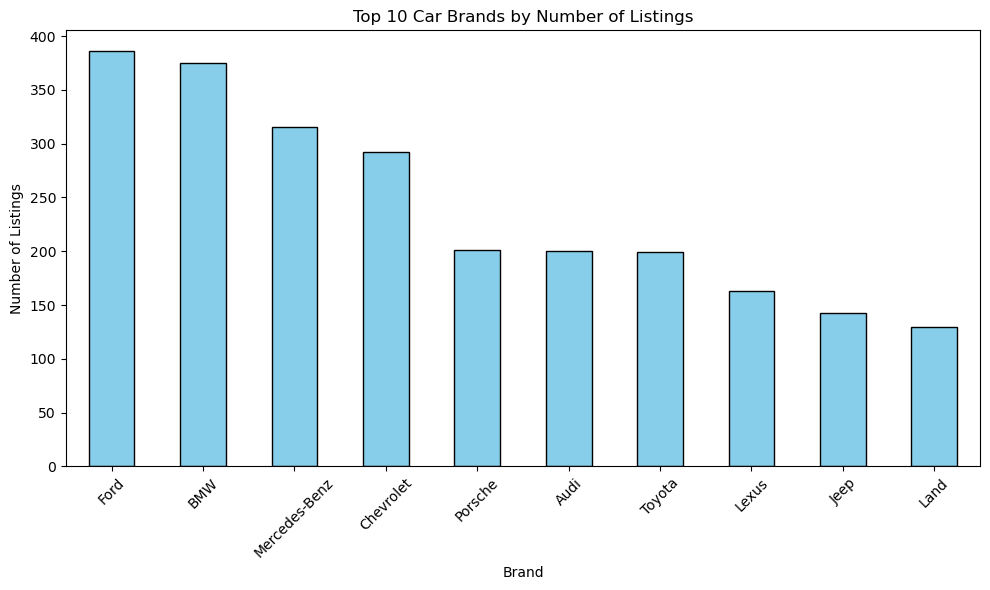

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Get the top 10 car brands by number of listings
top_brands = df['brand'].value_counts().head(10)

# Display results
print("Top 10 car brands by number of listings:")
print(top_brands)

# Plot bar chart
plt.figure(figsize=(10, 6))
top_brands.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 Car Brands by Number of Listings')
plt.xlabel('Brand')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## =4TH TASK CAR PRICE DISTRIBUTION

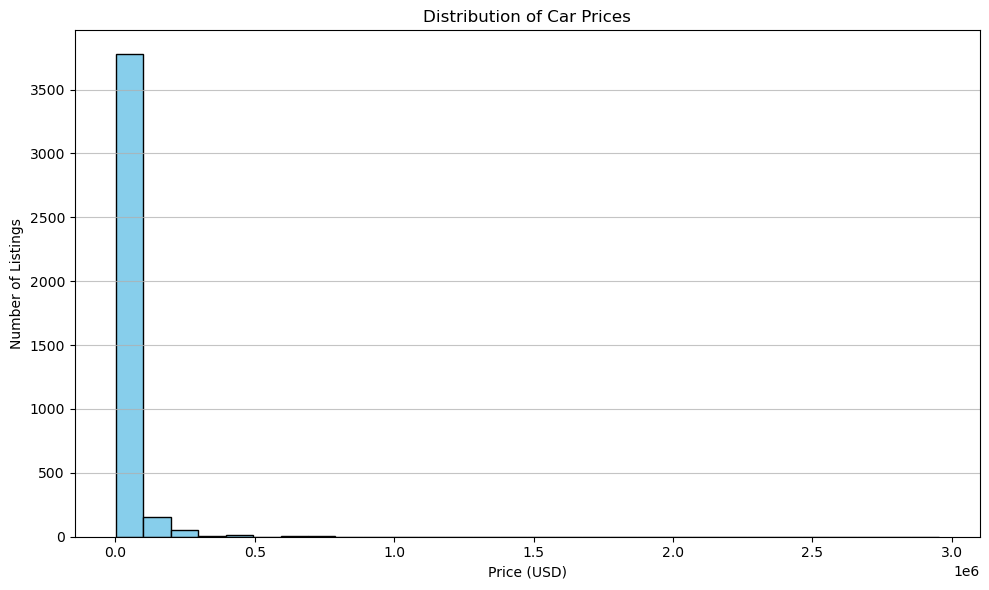

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Clean and convert price column to numeric
df['price'] = (df['price']
               .astype(str)
               .str.replace('$', '', regex=False)
               .str.replace(',', '', regex=False)
               .replace('', pd.NA)
               .astype(float))

# Plot histogram
plt.figure(figsize=(10,6))
plt.hist(df['price'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Car Prices')
plt.xlabel('Price (USD)')
plt.ylabel('Number of Listings')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()


In [37]:
# Clean and convert price to numeric
df['price'] = (df['price']
               .astype(str)
               .str.replace('$', '', regex=False)
               .str.replace(',', '', regex=False)
               .replace('', pd.NA)
               .astype(float))

# Drop missing prices
prices = df['price'].dropna()

# Calculate statistics
mean_price = prices.mean()
median_price = prices.median()
mode_price = prices.mode()[0] if not prices.mode().empty else None
std_dev_price = prices.std()

# Report
print(f"Mean Price: ${mean_price:,.2f}")
print(f"Median Price: ${median_price:,.2f}")
print(f"Mode Price: ${mode_price:,.2f}")
print(f"Standard Deviation: ${std_dev_price:,.2f}")


Mean Price: $44,553.19
Median Price: $31,000.00
Mode Price: $15,000.00
Standard Deviation: $78,710.64


## 5TH TASK NEVER ALWAYS MORE EXPENSIVE

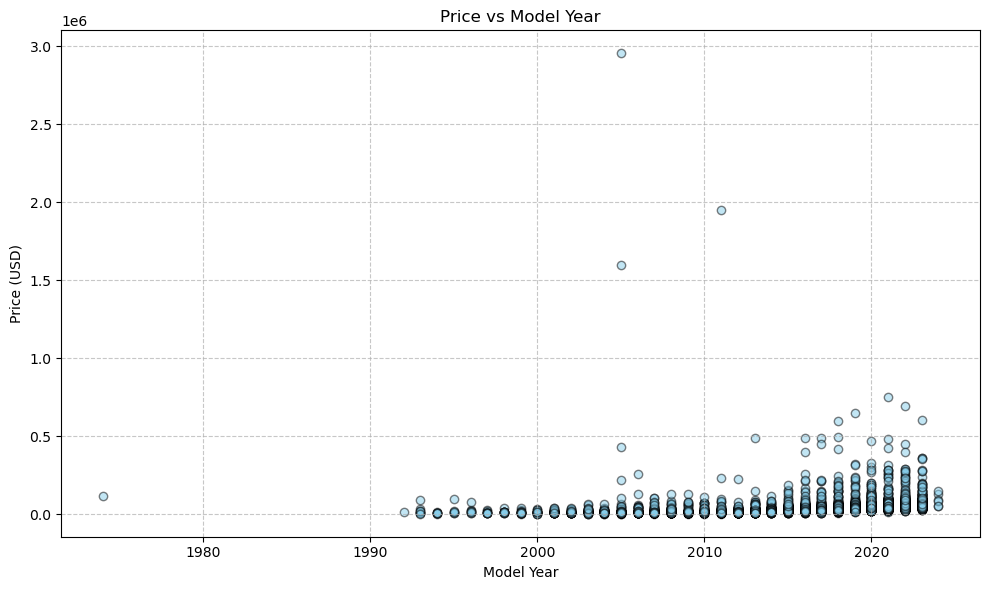

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Clean and convert price
df['price'] = (df['price']
               .astype(str)
               .str.replace('$', '', regex=False)
               .str.replace(',', '', regex=False)
               .replace('', pd.NA)
               .astype(float))

# Convert year to numeric
df['model_year'] = pd.to_numeric(df['model_year'], errors='coerce')

# Drop rows with missing price or year
df = df.dropna(subset=['price', 'model_year'])

# Plot scatter
plt.figure(figsize=(10, 6))
plt.scatter(df['model_year'], df['price'], alpha=0.5, color='skyblue', edgecolor='black')
plt.title('Price vs Model Year')
plt.xlabel('Model Year')
plt.ylabel('Price (USD)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [39]:
import pandas as pd

# Clean and convert price to numeric
df['price'] = (df['price']
               .astype(str)
               .str.replace('$', '', regex=False)
               .str.replace(',', '', regex=False)
               .replace('', pd.NA)
               .astype(float))

# Convert model_year to numeric
df['model_year'] = pd.to_numeric(df['model_year'], errors='coerce')

# Drop rows with missing values in price or model_year
df_clean = df.dropna(subset=['price', 'model_year'])

# Calculate correlation
correlation = df_clean['model_year'].corr(df_clean['price'])

print(f"Correlation between model year and price: {correlation:.3f}")
if correlation > 0:
    print("Positive correlation → newer cars generally cost more.")
elif correlation < 0:
    print("Negative correlation → newer cars generally cost less.")
else:
    print("No significant correlation between year and price.")


Correlation between model year and price: 0.199
Positive correlation → newer cars generally cost more.


##### END..........